In [1]:
import sys

sys.path.append("../")

In [68]:
import matrix_ops as mo
from typing import Callable
import numpy as np
import time
import matplotlib.pyplot as plt

sizes = [pow(2, i) for i in range(9)]

def time_it(f: Callable, *args) -> tuple[float, ...]:
    start = time.time()
    res = f(*args)
    ellapsed_time = time.time() - start
    return ellapsed_time, res


binet_time = []
strassen_time = []
hybrid_time = []
regular_time = []

for size in sizes:
    print(f"Calculating for matrix size {size}")
    mat1 = mo.createRandomMatrix(size, size)
    mat2 = mo.createRandomMatrix(size, size)

    res_binet, mat_binet = time_it(mo.binet, mat1, mat2)
    binet_time.append(res_binet)

    res_strassen, mat_strassen = time_it(mo.strassen, mat1, mat2)
    strassen_time.append(res_strassen)

    res_hybrid, mat_hybrid = time_it(mo.hybrid, mat1, mat2, size // 2)
    hybrid_time.append(res_hybrid)

    res_regular, mat_regular = time_it(mo.Matrix.__matmul__, mat1, mat2)
    regular_time.append(res_regular)


    assert np.allclose(mo.matrixToNumpy(mat_binet), mo.matrixToNumpy(mat_strassen)), "Matrices differ"
    assert np.allclose(mo.matrixToNumpy(mat_strassen), mo.matrixToNumpy(mat_hybrid)), "Matrices differ"
    assert np.allclose(mo.matrixToNumpy(mat_hybrid), mo.matrixToNumpy(mat_regular)), "Matrices differ"
    


Calculating for matrix size 1
Calculating for matrix size 2
Calculating for matrix size 4
Calculating for matrix size 8
Calculating for matrix size 16
Calculating for matrix size 32
Calculating for matrix size 64
Calculating for matrix size 128
Calculating for matrix size 256


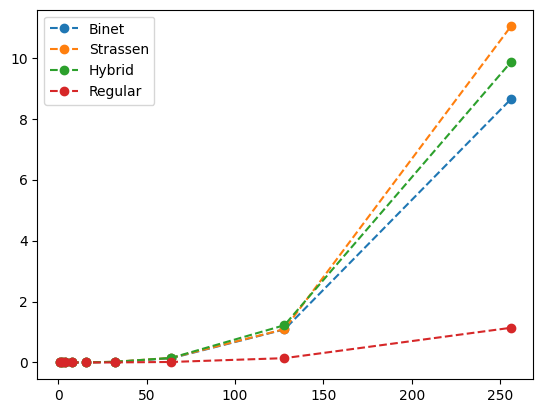

In [69]:
plt.plot(sizes, binet_time, label="Binet", linestyle = "dashed", marker="o")
plt.plot(sizes, strassen_time, label="Strassen", linestyle = "dashed", marker="o")
plt.plot(sizes, hybrid_time, label="Hybrid", linestyle = "dashed", marker="o")
plt.plot(sizes, regular_time, label="Regular", linestyle = "dashed", marker="o")

plt.legend()
plt.show()

In [25]:
print("Strassen times")
for i, size in enumerate(sizes):
    print(f"For size: {size} calculating time was {strassen_time[i]:.6}")

Strassen times
For size: 1 calculating time was 1.90735e-05
For size: 2 calculating time was 1.7643e-05
For size: 4 calculating time was 6.19888e-05
For size: 8 calculating time was 0.000453234
For size: 16 calculating time was 0.00301147
For size: 32 calculating time was 0.0230436
For size: 64 calculating time was 0.15472
For size: 128 calculating time was 1.11012
For size: 256 calculating time was 7.56977


In [26]:
print("Binet times")
for i, size in enumerate(sizes):
    print(f"For size: {size} calculating time was {binet_time[i]:.6}")

Binet times
For size: 1 calculating time was 2.47955e-05
For size: 2 calculating time was 1.78814e-05
For size: 4 calculating time was 4.07696e-05
For size: 8 calculating time was 0.000274897
For size: 16 calculating time was 0.00200295
For size: 32 calculating time was 0.0167794
For size: 64 calculating time was 0.134241
For size: 128 calculating time was 1.11278
For size: 256 calculating time was 8.78324


In [28]:
l_tab = [3, 4, 5, 6]
l_times =[[] for _ in range(len(l_tab))]

for i, l in enumerate(l_tab):
    for size in sizes:
        mat1 = mo.createRandomMatrix(size, size)
        mat2 = mo.createRandomMatrix(size, size)

        res_hybrid, mat_hybrid = time_it(mo.hybrid, mat1, mat2, 2**l)
        l_times[i].append(res_hybrid)

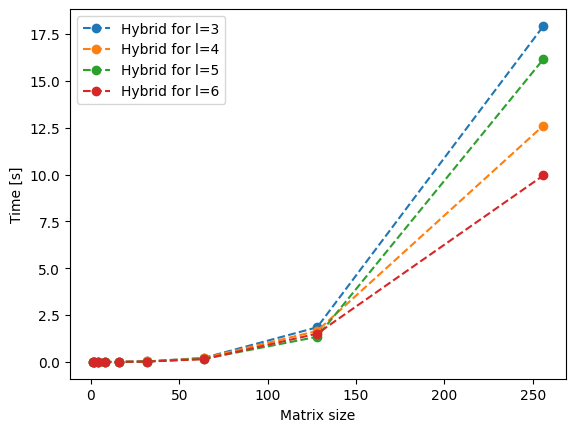

In [ ]:
for l, l_time in enumerate(l_times):
    plt.plot(sizes, l_time, label=f"Hybrid for l={l_tab[l]}", linestyle = "dashed", marker="o")


plt.xlabel("Matrix size")
plt.ylabel("Time [s]")
plt.legend()
plt.show()

In [53]:
strassen_add = [
    0,
    18,
    198,
    1674,
    12870,
    94698,
    681318,
    4842954,
    34195590 
]

strassen_mul = [
    1,
    7,
    49,
    343,
    2401,
    16807,
    117649,
    823543,
    5764801
]

binet_add = [
    0,
    4,
    48,
    448,
    3840,
    31744,
    258048,
    2080768,
    16711680
]

binet_mul = [
    1,
    8,
    64,
    512,
    4096,
    32768,
    262144,
    2097152,
    16777216
]

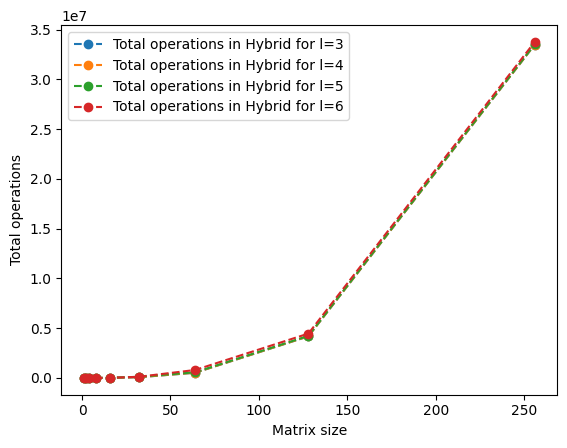

In [71]:
for l in l_tab:
    total_op = []
    for j, size in enumerate(sizes):
        if size <= 2**l:
            total_op.append(strassen_add[j] + strassen_mul[j])
        else:
            total_op.append(binet_add[j] + binet_mul[j] - binet_add[l] - binet_mul[l] + strassen_add[l] + strassen_mul[l])
    
    plt.plot(sizes, total_op, label=f"Total operations in Hybrid for l={l}", linestyle = "dashed", marker="o")

plt.xlabel("Matrix size")
plt.ylabel("Total operations")
plt.legend()
plt.show()